In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)



2.8.0


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [3]:
x_train.shape  # (50000, 32, 32, 3)
y_train.shape  # (50000, 1)
x_test.shape   # (10000, 32, 32, 3)
y_test.shape   # (10000, 1)

(10000, 1)

In [4]:
X = np.vstack((x_train , x_test))   # (60000, 32, 32, 3)
Y = np.vstack((y_train , y_test))   # (60000, 1)

In [5]:
from sklearn.model_selection import train_test_split

TEST_RATIO = 1/6
TRAIN_RATIO = 4/5
VALIDATION_RATIO = 1/5


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=TEST_RATIO)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=VALIDATION_RATIO)

In [6]:
X_train.shape

(40000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
X_val.shape

(10000, 32, 32, 3)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val   = X_val / 255.0

In [10]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

[38]


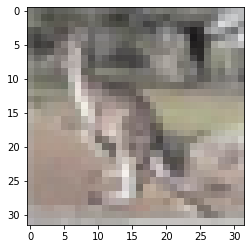

In [11]:
plt.imshow(X_train[1131])
print(y_train[1131])

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(32,32,3)))  # image size

model.add(tf.keras.layers.Conv2D(32,3,strides=1, activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(64,3,strides=1, activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(128,3,strides=1 , activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation="relu"))
model.add(tf.keras.layers.Dense(128,activation="relu"))
model.add(tf.keras.layers.Dense(100,activation="softmax"))

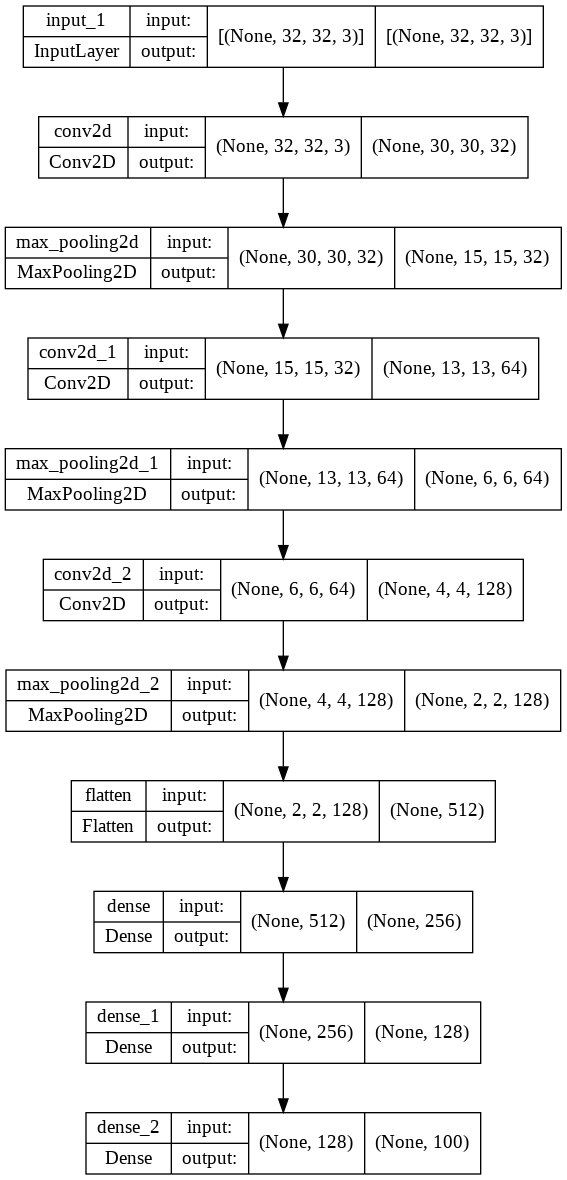

In [13]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc' , 'accuracy' ])

In [15]:


class myCallback(tf.keras.callbacks.Callback):
  
  queue = [60 ,50 , 40 , 30 , 20]


  def is_hopeless(self ):
    return self.queue == sorted(self.queue)

  def on_epoch_end(self , epoch , logs=None):
    if epoch < 2 :
      self.queue = [60 ,50 , 40 , 30 , 20]
    print(" \n QUEUE : " , self.queue , "\n")
    self.queue.pop(0)
    self.queue.append(logs['val_loss'])
    if( self.is_hopeless() ):
      print("\n\n loss value on validation set is not improved for five epochs ! \n\n")
      self.model.stop_training = True

  

  

In [16]:
callbacks = myCallback()

In [17]:
history = model.fit( X_train, y_train , validation_data=(X_val ,y_val), epochs = 5000 , callbacks=[callbacks] , batch_size=800)

Epoch 1/5000
50/50 [==============================] - ETA: 0s - loss: 4.4640 - acc: 0.0245 - accuracy: 0.0245 
 QUEUE :  [60, 50, 40, 30, 20] 

50/50 [==============================] - 8s 77ms/step - loss: 4.4640 - acc: 0.0245 - accuracy: 0.0245 - val_loss: 4.2134 - val_acc: 0.0505 - val_accuracy: 0.0505
Epoch 2/5000
49/50 [============================>.] - ETA: 0s - loss: 4.0518 - acc: 0.0795 - accuracy: 0.0795 
 QUEUE :  [60, 50, 40, 30, 20] 

50/50 [==============================] - 3s 51ms/step - loss: 4.0479 - acc: 0.0803 - accuracy: 0.0803 - val_loss: 3.9362 - val_acc: 0.0970 - val_accuracy: 0.0970
Epoch 3/5000
50/50 [==============================] - ETA: 0s - loss: 3.7840 - acc: 0.1245 - accuracy: 0.1245 
 QUEUE :  [50, 40, 30, 20, 3.9362289905548096] 

50/50 [==============================] - 3s 52ms/step - loss: 3.7840 - acc: 0.1245 - accuracy: 0.1245 - val_loss: 3.6649 - val_acc: 0.1459 - val_accuracy: 0.1459
Epoch 4/5000
49/50 [============================>.] - ETA: 0s - lo

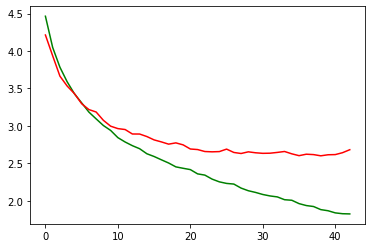

In [18]:
plt.plot(history.history['loss'] , color = 'green')
plt.plot(history.history['val_loss'] , color = 'red')

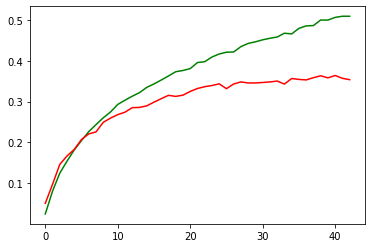

In [19]:
plt.plot(history.history['accuracy'] , color = 'green')
plt.plot(history.history['val_accuracy'] , color = 'red')

In [20]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.Input(shape=(32,32,3)))  # image size

model1.add(tf.keras.layers.Conv2D(32,3,strides=1, activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.35))

model1.add(tf.keras.layers.Conv2D(64,3,strides=1, activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.40))

model1.add(tf.keras.layers.Conv2D(128,3,strides=1 , activation="relu"))
model1.add(tf.keras.layers.MaxPool2D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.20))

model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(256,activation="relu"))
model1.add(tf.keras.layers.Dropout(0.35))

model1.add(tf.keras.layers.Dense(128,activation="relu"))
model1.add(tf.keras.layers.Dropout(0.30))

model1.add(tf.keras.layers.Dense(100,activation="softmax"))



model1.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['acc' , 'accuracy' ])

history1 = model1.fit( X_train, y_train , validation_data=(X_val ,y_val), epochs = 5000 , callbacks=[callbacks] , batch_size=800)

Epoch 1/5000
50/50 [==============================] - ETA: 0s - loss: 4.5285 - acc: 0.0180 - accuracy: 0.0180 
 QUEUE :  [60, 50, 40, 30, 20] 

50/50 [==============================] - 5s 68ms/step - loss: 4.5285 - acc: 0.0180 - accuracy: 0.0180 - val_loss: 4.4524 - val_acc: 0.0272 - val_accuracy: 0.0272
Epoch 2/5000
50/50 [==============================] - ETA: 0s - loss: 4.3646 - acc: 0.0322 - accuracy: 0.0322 
 QUEUE :  [60, 50, 40, 30, 20] 

50/50 [==============================] - 3s 61ms/step - loss: 4.3646 - acc: 0.0322 - accuracy: 0.0322 - val_loss: 4.2828 - val_acc: 0.0693 - val_accuracy: 0.0693
Epoch 3/5000
50/50 [==============================] - ETA: 0s - loss: 4.2278 - acc: 0.0511 - accuracy: 0.0511 
 QUEUE :  [50, 40, 30, 20, 4.282750129699707] 

50/50 [==============================] - 3s 59ms/step - loss: 4.2278 - acc: 0.0511 - accuracy: 0.0511 - val_loss: 4.2048 - val_acc: 0.0676 - val_accuracy: 0.0676
Epoch 4/5000
50/50 [==============================] - ETA: 0s - los

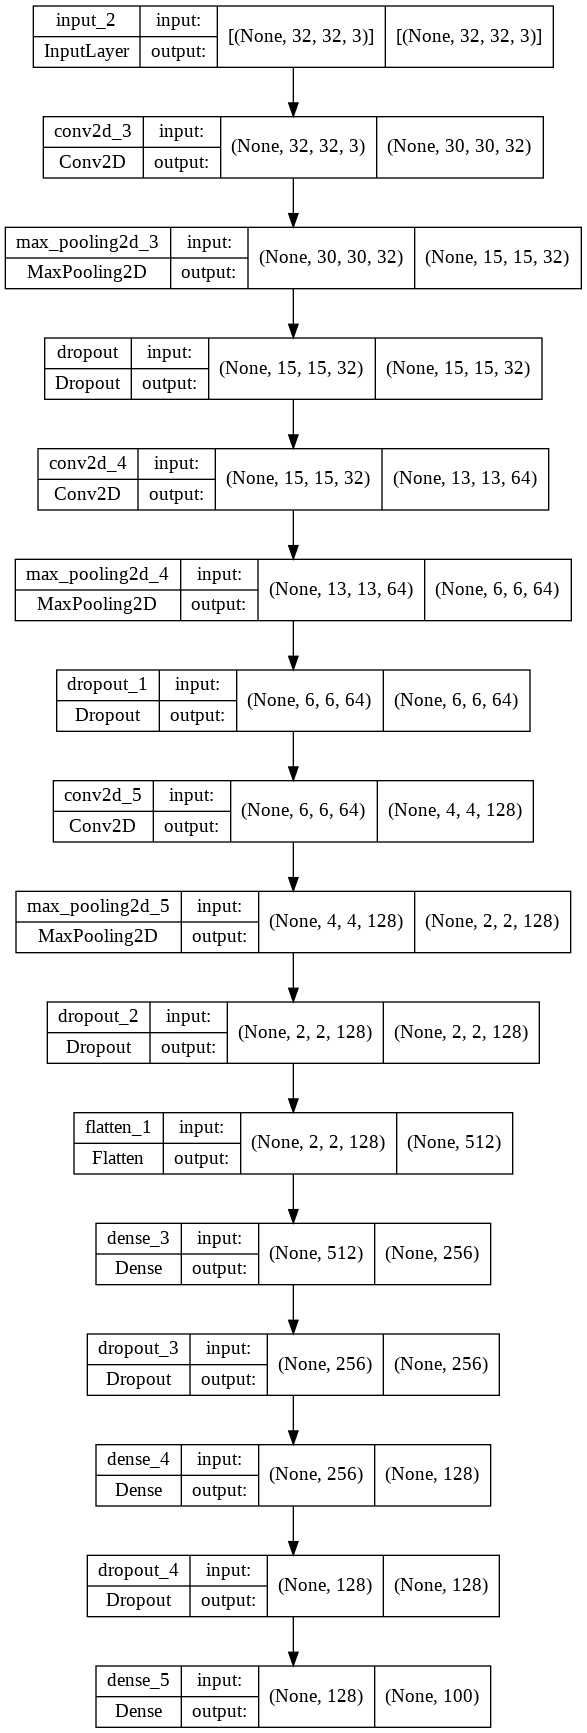

In [21]:
tf.keras.utils.plot_model(model1,show_shapes=True)

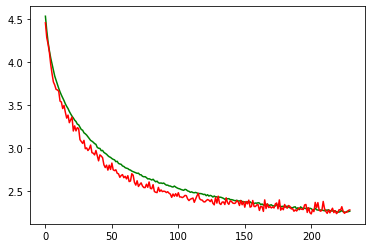

In [22]:
plt.plot(history1.history['loss'] , color = 'green')
plt.plot(history1.history['val_loss'] , color = 'red')

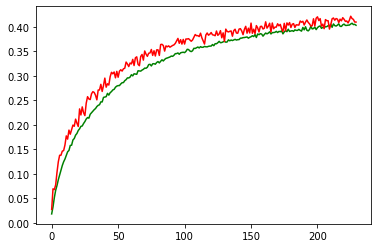

In [23]:
plt.plot(history1.history['accuracy'] , color = 'green')
plt.plot(history1.history['val_accuracy'] , color = 'red')